In [2]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt
from utils import *
from scipy.fft import fft

In [19]:
1/90/0.000165/2 //2*2 + 1

33.0

In [3]:
all_data = pd.DataFrame()
freq = 9
polyorder = 3
window_length = 1
for file in filter(lambda x: ("_"+str(freq)+"Hz" in x) and x.endswith(".txt"), os.listdir("amb_sin/")):
    print(file)
    df = load_amb_sin_data("amb_sin/" + file).iloc[10000:]
    df["f_ay"] -= df["f_ay"].mean()
    df["f_ax"] -= df["f_ax"].mean()
    df["f_bx"] -= df["f_bx"].mean()
    df["f_by"] -= df["f_by"].mean()
    df["x"] = (df["ax"] + df["bx"])/2
    #df["x"] = df["ax"]
    df["y"] = (df["ay"] + df["by"])/2
    #df["y"] = df["ay"]
    df['fx'] = df["f_ax"] + df["f_bx"]
    #df["fx"] = df["f_ax"]
    df['fy'] = df["f_ay"] + df["f_by"]
    #df["fx"] = df["f_ay"]
    df = df[["datetime", "x", "y", "fx", "fy"]]
    mean_dt = (df["datetime"] - df["datetime"].shift()).median().delta*1e-9
    for col in ["x", "y"]:
        df = append_derivatives_to_dataframe(df, col, dt=mean_dt, window_length=window_length, polyorder=polyorder)

    df = append_derivatives_to_dataframe(df, "fx", dt=mean_dt, window_length=window_length, polyorder=polyorder)
    df = append_derivatives_to_dataframe(df, "fy", dt=mean_dt, window_length=window_length, polyorder=polyorder)
    
    all_data = pd.concat([all_data, df], ignore_index=True)

sine_fx_9Hz_0RPM.txt


/home/felipeangelim/.local/lib/python3.8/site-packages/scipy/signal/_savitzky_golay.py:218: RankWarning: Polyfit may be poorly conditioned
  _fit_edge(x, 0, window_length, 0, halflen, axis,
/home/felipeangelim/.local/lib/python3.8/site-packages/scipy/signal/_savitzky_golay.py:221: RankWarning: Polyfit may be poorly conditioned
  _fit_edge(x, n - window_length, n, n - halflen, n, axis,
/home/felipeangelim/.local/lib/python3.8/site-packages/scipy/signal/_savitzky_golay.py:218: RankWarning: Polyfit may be poorly conditioned
  _fit_edge(x, 0, window_length, 0, halflen, axis,
/home/felipeangelim/.local/lib/python3.8/site-packages/scipy/signal/_savitzky_golay.py:221: RankWarning: Polyfit may be poorly conditioned
  _fit_edge(x, n - window_length, n, n - halflen, n, axis,
/home/felipeangelim/.local/lib/python3.8/site-packages/scipy/signal/_savitzky_golay.py:218: RankWarning: Polyfit may be poorly conditioned
  _fit_edge(x, 0, window_length, 0, halflen, axis,
/home/felipeangelim/.local/lib/pyt

sine_fy_9Hz_0RPM.txt


/home/felipeangelim/.local/lib/python3.8/site-packages/scipy/signal/_savitzky_golay.py:218: RankWarning: Polyfit may be poorly conditioned
  _fit_edge(x, 0, window_length, 0, halflen, axis,
/home/felipeangelim/.local/lib/python3.8/site-packages/scipy/signal/_savitzky_golay.py:221: RankWarning: Polyfit may be poorly conditioned
  _fit_edge(x, n - window_length, n, n - halflen, n, axis,
/home/felipeangelim/.local/lib/python3.8/site-packages/scipy/signal/_savitzky_golay.py:218: RankWarning: Polyfit may be poorly conditioned
  _fit_edge(x, 0, window_length, 0, halflen, axis,
/home/felipeangelim/.local/lib/python3.8/site-packages/scipy/signal/_savitzky_golay.py:221: RankWarning: Polyfit may be poorly conditioned
  _fit_edge(x, n - window_length, n, n - halflen, n, axis,
/home/felipeangelim/.local/lib/python3.8/site-packages/scipy/signal/_savitzky_golay.py:218: RankWarning: Polyfit may be poorly conditioned
  _fit_edge(x, 0, window_length, 0, halflen, axis,
/home/felipeangelim/.local/lib/pyt

In [4]:
#all_data.to_csv("amb_sin/all_center_of_mass.csv")
#all_data = pd.read_csv("amb_sin/all_center_of_mass.csv")

In [5]:
df = all_data

In [6]:
df.shape

(123360, 13)

In [7]:
mean_dt = 0.000195

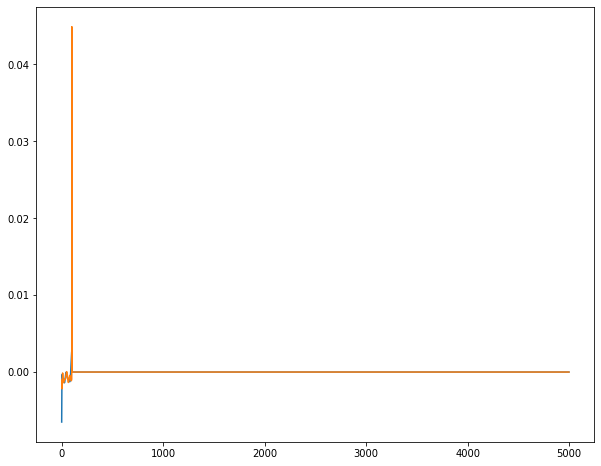

In [8]:
plt.figure(figsize=(10, 8))
plt.plot(df["y_dot"].iloc[:5000])
plt.plot((df["y"] - df["y"].shift(1)).iloc[:5000]/mean_dt)

In [328]:
df.columns

Index(['datetime', 'x', 'y', 'fx', 'fy', 'x_dot', 'x_dot2', 'y_dot', 'y_dot2',
       'fx_dot', 'fx_dot2', 'fy_dot', 'fy_dot2'],
      dtype='object')

In [329]:
q = np.expand_dims(df[['x', 'y']].values, axis=-1)
q_dot = np.expand_dims(df[['x_dot', 'y_dot']].values, axis=-1)
q_dot2 = np.expand_dims(df[['x_dot2', 'y_dot2']].values, axis=-1)
f = np.expand_dims(df[['fx', 'fy']].values, axis=-1)

#q = np.squeeze(q)
#q_dot = np.squeeze(q_dot)
#q_dot2 = np.squeeze(q_dot2)
#f = np.squeeze(f)

In [330]:
q_dot

array([[[ 0.00608435],
        [-0.00102834]],

       [[ 0.00608138],
        [-0.00102428]],

       [[ 0.00607796],
        [-0.00102019]],

       ...,

       [[-0.00026335],
        [-0.00189617]],

       [[-0.00025233],
        [-0.00198711]],

       [[-0.00024122],
        [-0.0020786 ]]])

(0.0, 5000.0)

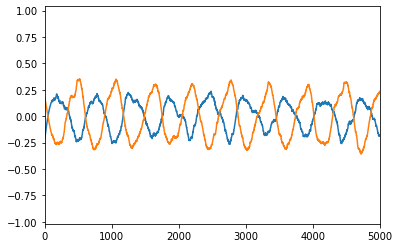

In [331]:
plt.plot(df["fy"])
plt.plot(df["fx"])
plt.xlim((0, 5000))

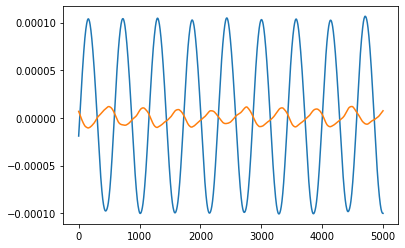

In [332]:
plt.plot(np.squeeze(q)[:5000])

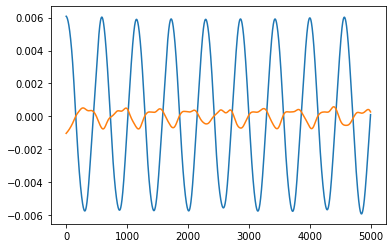

In [333]:
plt.plot(np.squeeze(q_dot)[:5000])

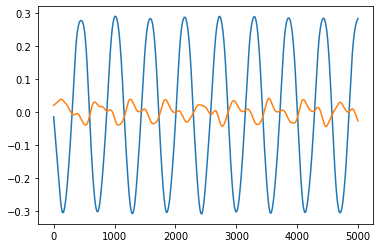

In [334]:
plt.plot(np.squeeze(q_dot2)[:5000])

(0.0, 500.0)

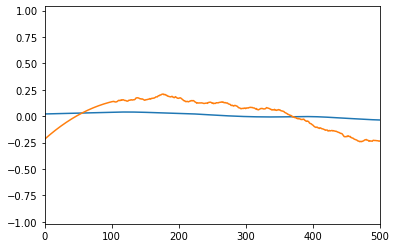

In [335]:
plt.plot(df["y_dot2"])
plt.plot(df["fy"])
plt.xlim((0, 500))

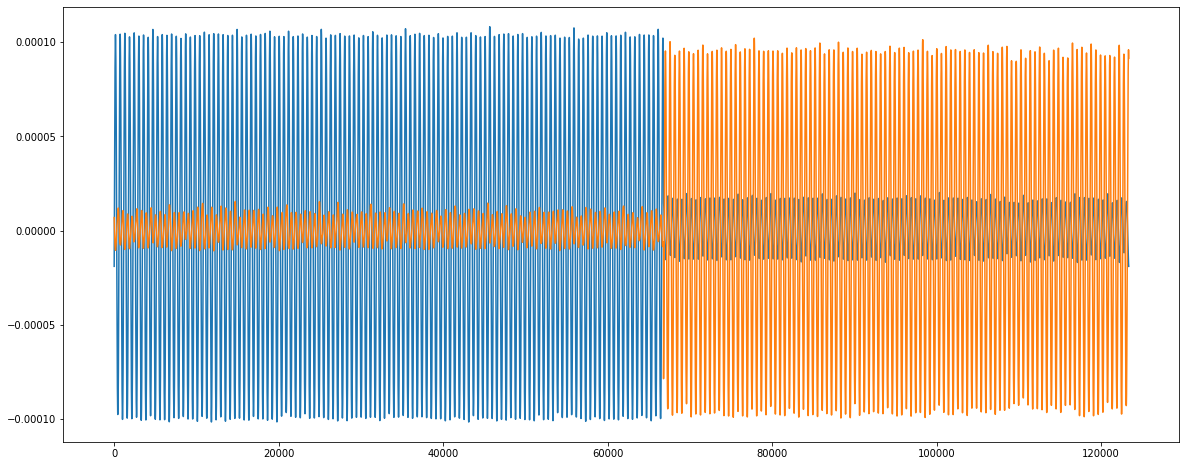

In [336]:
plt.figure(figsize=(20, 8))
plt.plot(np.squeeze(q))

# Treinamento q_dot2

In [352]:
from jax import random
from jax.experimental.optimizers import adam, sgd
from jax import numpy as jnp
%load_ext autoreload
%autoreload 2
from models.newton import mse, initialize_params, get_batch_forward_pass, get_loss_function, train
from tqdm import tqdm

from utils import Shuffler

rng = random.PRNGKey(15)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [353]:
params = initialize_params(rng, dims=2, scale=1)
batch_forward_pass = get_batch_forward_pass(mass=[[1, 0],[0, 1]], g=jnp.array([[0],[0]]))

In [354]:

shuffler = Shuffler(len(q))
q_shuffled = shuffler.shuffle(q)
q_dot_shuffled = shuffler.shuffle(q_dot)
q_dot2_shuffled = shuffler.shuffle(q_dot2)
f_shuffled = shuffler.shuffle(f)

In [355]:
params

[DeviceArray([[ 0.09981377, -1.6656423 ],
              [ 0.17985861,  0.14516467]], dtype=float32),
 DeviceArray([[ 0.08199833,  2.0304651 ],
              [ 0.77214444, -0.07478045]], dtype=float32)]

In [356]:
#params = [jnp.array([[-302540.24339204,    8293.15047838],
#                     [-3526.76033189, -291654.7198465 ]]),
#          jnp.array([[23.24364829, -3.40466658],
#                     [-1.39629066, 38.48061365]])]

In [357]:
params[0] = params[0] + jnp.array([[1e5, 0], [0, 1e5]])
params

[DeviceArray([[ 1.0000010e+05, -1.6656423e+00],
              [ 1.7985861e-01,  1.0000015e+05]], dtype=float32),
 DeviceArray([[ 0.08199833,  2.0304651 ],
              [ 0.77214444, -0.07478045]], dtype=float32)]

  0%|          | 1/3855 [00:00<10:54,  5.89it/s]

Epoch 0


100%|██████████| 3855/3855 [00:25<00:00, 151.90it/s]


Epoch 0 , mean error: 4.1155105 params: [DeviceArray([[3394.3499 , 4511.966  ],
             [1939.369  , -586.12756]], dtype=float32), DeviceArray([[ 14.879861, -16.05416 ],
             [ -6.652686,  18.637156]], dtype=float32)]


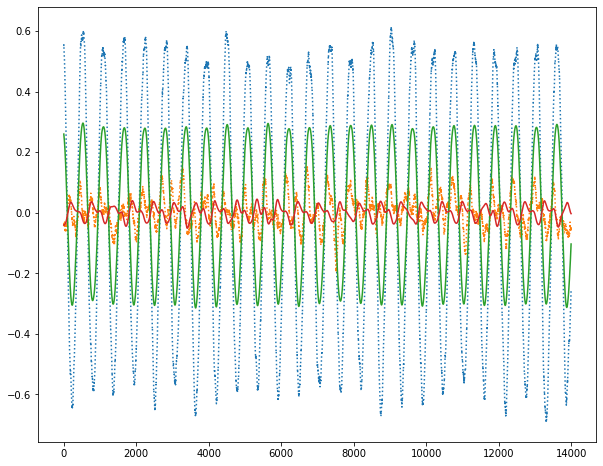

  0%|          | 16/3855 [00:00<00:25, 151.97it/s]

Epoch 1


100%|██████████| 3855/3855 [00:25<00:00, 152.35it/s]


Epoch 1 , mean error: 0.004043463 params: [DeviceArray([[  535.989 ,  3653.9495],
             [ 1006.3755, -5198.132 ]], dtype=float32), DeviceArray([[ 18.239346, -21.460587],
             [ -4.268244,  31.00705 ]], dtype=float32)]


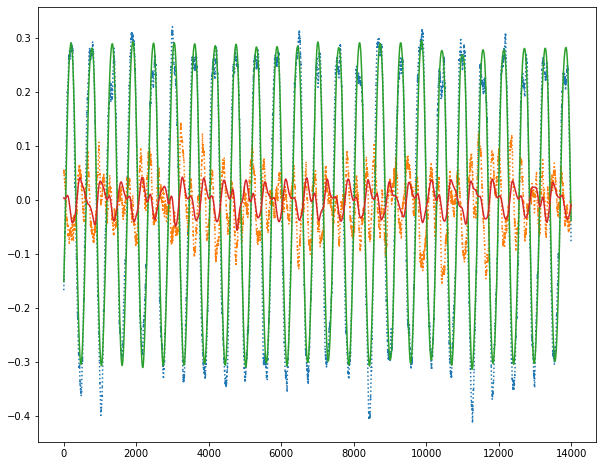

  0%|          | 14/3855 [00:00<00:28, 134.95it/s]

Epoch 2


100%|██████████| 3855/3855 [00:26<00:00, 147.96it/s]


Epoch 2 , mean error: 0.0017685961 params: [DeviceArray([[  554.99335,  3719.409  ],
             [  997.123  , -5203.696  ]], dtype=float32), DeviceArray([[ 2.0325308e+01, -1.8763779e+01],
             [-9.1960728e-03,  2.9490564e+01]], dtype=float32)]


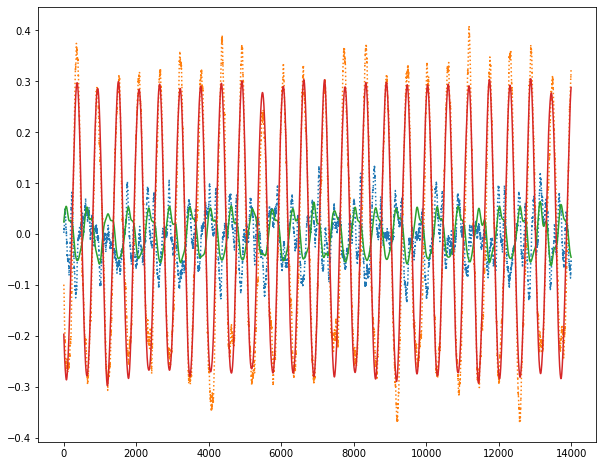

  0%|          | 15/3855 [00:00<00:26, 146.51it/s]

Epoch 3


 11%|█         | 423/3855 [00:02<00:23, 144.44it/s]


KeyboardInterrupt: 

In [359]:
window = 14000

def callback(y_pred, y_true):
    
    plt.figure(figsize=(10, 8))
    random_ind = int(np.random.uniform(0, len(y_pred) - window - 1))
    plt.plot(shuffler.undo_shuffle(np.squeeze(y_pred))[random_ind:(random_ind + window)], linestyle="dotted")
    plt.plot(shuffler.undo_shuffle(np.squeeze(y_true))[random_ind:(random_ind + window)])
    plt.show()


params=train(params, q_shuffled, q_dot_shuffled, q_dot2_shuffled, f_shuffled, batch_size=32, optimizer=adam, step_size=1e2, epochs=10, callback=callback, batch_forward_pass=batch_forward_pass)

# Treinamento f

In [274]:
from jax import random
from jax.experimental.optimizers import adam, sgd
from jax import numpy as jnp
%load_ext autoreload
%autoreload 2
from models.newton_f import mse, initialize_params, get_batch_forward_pass, get_loss_function, train
from tqdm import tqdm

from utils import Shuffler

rng = random.PRNGKey(20)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [275]:
params = initialize_params(rng, dims=2)
batch_forward_pass = get_batch_forward_pass(mass=[[1, 0],[0, 1]], g=jnp.array([[0],[0]]))

In [276]:

shuffler = Shuffler(len(q))
q_shuffled = shuffler.shuffle(q)
q_dot_shuffled = shuffler.shuffle(q_dot)
q_dot2_shuffled = shuffler.shuffle(q_dot2)
f_shuffled = shuffler.shuffle(f)

In [277]:
params

[DeviceArray([[ 1.7915533 ,  1.2887611 ],
              [-0.80017525, -0.7377225 ]], dtype=float32),
 DeviceArray([[-0.25917432,  0.90940464],
              [-0.12921625,  0.5661653 ]], dtype=float32)]

  0%|          | 1/1120 [00:00<02:25,  7.69it/s]

Epoch 0


100%|██████████| 1120/1120 [00:06<00:00, 183.24it/s]


Epoch 0 , mean error: 0.0027493434 params: [DeviceArray([[  570.7255 ,  3647.6704 ],
             [  971.13446, -5186.7256 ]], dtype=float32), DeviceArray([[ 13.289799 , -16.81527  ],
             [ -2.5433888,  36.291725 ]], dtype=float32)]


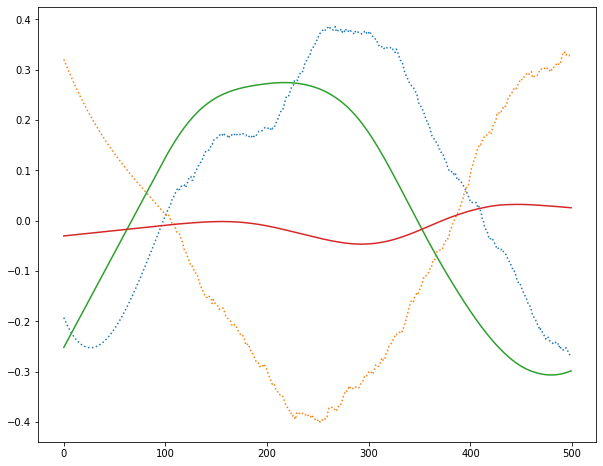

  0%|          | 0/1120 [00:00<?, ?it/s]

Epoch 1


100%|██████████| 1120/1120 [00:06<00:00, 180.74it/s]


Epoch 1 , mean error: 0.0016323881 params: [DeviceArray([[  573.9467,  3652.3582],
             [  949.9611, -5180.38  ]], dtype=float32), DeviceArray([[ 16.146313 , -18.219196 ],
             [ -4.2802086,  31.069527 ]], dtype=float32)]


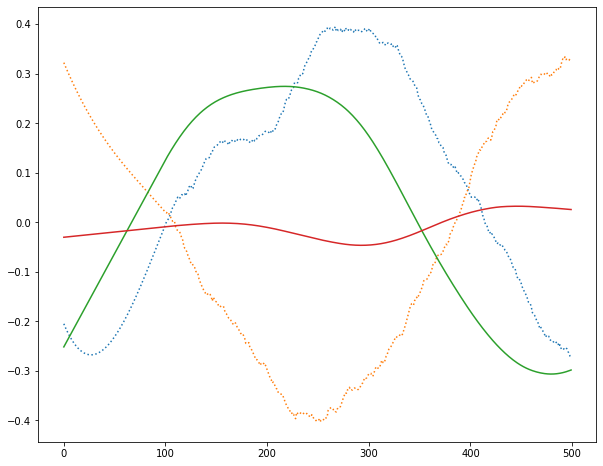

  0%|          | 0/1120 [00:00<?, ?it/s]

Epoch 2


100%|██████████| 1120/1120 [00:06<00:00, 183.42it/s]


Epoch 2 , mean error: 0.0016606606 params: [DeviceArray([[  573.4253,  3652.9702],
             [  943.9141, -5173.0283]], dtype=float32), DeviceArray([[ 16.391293 , -18.942398 ],
             [ -3.6911278,  25.505875 ]], dtype=float32)]


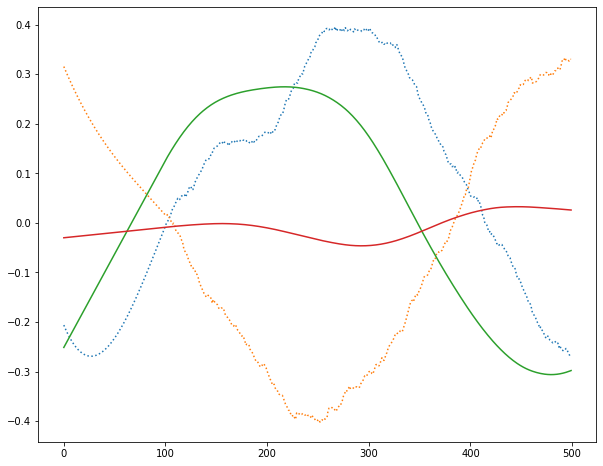

  0%|          | 0/1120 [00:00<?, ?it/s]

Epoch 3


100%|██████████| 1120/1120 [00:06<00:00, 183.32it/s]


Epoch 3 , mean error: 0.0016720612 params: [DeviceArray([[  574.4343,  3649.3577],
             [  940.9512, -5168.013 ]], dtype=float32), DeviceArray([[ 16.740337 , -19.393723 ],
             [ -3.7690349,  24.827595 ]], dtype=float32)]


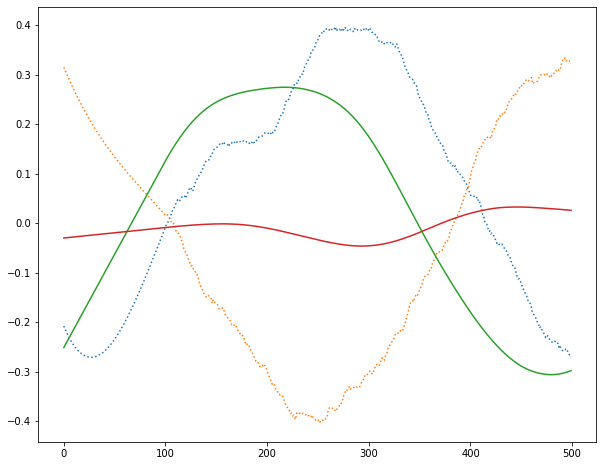

In [278]:


def callback(y_pred, y_true):
    
    plt.figure(figsize=(10, 8))
    plt.plot(shuffler.undo_shuffle(np.squeeze(y_pred))[:500], linestyle="dotted")
    plt.plot(shuffler.undo_shuffle(np.squeeze(y_true))[:500])
    plt.show()


train(params, q_shuffled, q_dot_shuffled, q_dot2_shuffled, f_shuffled, batch_size=128, optimizer=adam, step_size=1e2, epochs=4, callback=callback, batch_forward_pass=batch_forward_pass)